In [1]:
import pandas as pd
df = pd.read_csv("ViewingActivity.csv")
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Linh Tran,2023-07-10 10:59:17,00:00:04,Autoplayed: user action: None;,Saison 1 (Extrait) : Sonic Prime,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:04,00:00:04,FR (France)
1,Linh Tran,2023-05-01 15:35:11,00:00:03,Autoplayed: user action: None;,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...,NaN,Xiaomi M12 Set Top Box,00:00:07,00:00:07,FR (France)
2,Linh Tran,2023-05-01 15:11:57,00:22:53,Autoplayed: user action: User_Interaction;,PAW Patrol : La Pat'Patrouille: Saison 6: La S...,NaN,Xiaomi M12 Set Top Box,00:22:55,00:22:55,FR (France)
3,Linh Tran,2023-04-21 19:18:55,00:21:52,NaN,PAW Patrol : La Pat'Patrouille: Saison 6: La P...,NaN,Xiaomi M12 Set Top Box,00:21:52,00:21:52,FR (France)
4,Linh Tran,2023-04-21 19:18:47,00:00:04,Autoplayed: user action: None;,Season 6: Clip Replay: PAW Patrol,HOOK,Xiaomi M12 Set Top Box,00:00:04,00:00:04,FR (France)


In [2]:
df.shape

(2927, 10)

In [3]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [4]:
# Remove unnecessary columns
newdfaus = df.filter(items = ["Profile Name","Start Time", "Duration", "Title"])
newdfaus

,Profile Name,Start Time,Duration,Title
0,Linh Tran,2023-07-10 10:59:17,00:00:04,Saison 1 (Extrait) : Sonic Prime
1,Linh Tran,2023-05-01 15:35:11,00:00:03,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...
2,Linh Tran,2023-05-01 15:11:57,00:22:53,PAW Patrol : La Pat'Patrouille: Saison 6: La S...
3,Linh Tran,2023-04-21 19:18:55,00:21:52,PAW Patrol : La Pat'Patrouille: Saison 6: La P...
4,Linh Tran,2023-04-21 19:18:47,00:00:04,Season 6: Clip Replay: PAW Patrol
...,...,...,...,...
2922,tatiendat21,2022-09-16 13:12:07,00:00:32,Archer: Saison 3: Frères de la côte - 1re part...
2923,tatiendat21,2022-09-16 13:11:50,00:00:14,Archer: Saison 1: Trouver la taupe (Épisode 1)
2924,tatiendat21,2022-09-14 09:53:56,00:00:39,Saison 1 (Extrait) : Sandman
2925,tatiendat21,2022-09-14 09:51:15,00:00:03,Sandman: Saison 1: Le sommeil du juste (Épisod...


In [5]:
# AUS - Convert Start Time column elements to datetime type
newdfaus["Start Time"] = pd.to_datetime(newdfaus["Start Time"], utc = True)
newdfaus.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [6]:
# AUS - Set the Start Time column as the index to convert to Australia/Melbourne timezone
newdfaus = newdfaus.set_index("Start Time")
newdfaus.index = newdfaus.index.tz_convert("Australia/Melbourne")
newdfaus

,Profile Name,Duration,Title
Start Time,,,
2023-07-10 20:59:17+10:00,Linh Tran,00:00:04,Saison 1 (Extrait) : Sonic Prime
2023-05-02 01:35:11+10:00,Linh Tran,00:00:03,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...
2023-05-02 01:11:57+10:00,Linh Tran,00:22:53,PAW Patrol : La Pat'Patrouille: Saison 6: La S...
2023-04-22 05:18:55+10:00,Linh Tran,00:21:52,PAW Patrol : La Pat'Patrouille: Saison 6: La P...
2023-04-22 05:18:47+10:00,Linh Tran,00:00:04,Season 6: Clip Replay: PAW Patrol
...,...,...,...
2022-09-16 23:12:07+10:00,tatiendat21,00:00:32,Archer: Saison 3: Frères de la côte - 1re part...
2022-09-16 23:11:50+10:00,tatiendat21,00:00:14,Archer: Saison 1: Trouver la taupe (Épisode 1)
2022-09-14 19:53:56+10:00,tatiendat21,00:00:39,Saison 1 (Extrait) : Sandman


In [7]:
# AUS - Reset the index column to make the Start Time a column again
newdfaus = newdfaus.reset_index()
newdfaus

,Start Time,Profile Name,Duration,Title
0,2023-07-10 20:59:17+10:00,Linh Tran,00:00:04,Saison 1 (Extrait) : Sonic Prime
1,2023-05-02 01:35:11+10:00,Linh Tran,00:00:03,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...
2,2023-05-02 01:11:57+10:00,Linh Tran,00:22:53,PAW Patrol : La Pat'Patrouille: Saison 6: La S...
3,2023-04-22 05:18:55+10:00,Linh Tran,00:21:52,PAW Patrol : La Pat'Patrouille: Saison 6: La P...
4,2023-04-22 05:18:47+10:00,Linh Tran,00:00:04,Season 6: Clip Replay: PAW Patrol
...,...,...,...,...
2922,2022-09-16 23:12:07+10:00,tatiendat21,00:00:32,Archer: Saison 3: Frères de la côte - 1re part...
2923,2022-09-16 23:11:50+10:00,tatiendat21,00:00:14,Archer: Saison 1: Trouver la taupe (Épisode 1)
2924,2022-09-14 19:53:56+10:00,tatiendat21,00:00:39,Saison 1 (Extrait) : Sandman
2925,2022-09-14 19:51:15+10:00,tatiendat21,00:00:03,Sandman: Saison 1: Le sommeil du juste (Épisod...


In [8]:
# AUS - Double check the datatype
newdfaus.dtypes

Start Time      datetime64[ns, Australia/Melbourne]
Profile Name                                 object
Duration                                     object
Title                                        object
dtype: object

In [9]:
# AUS - Convert Duration to timedelta type and double check the datatype
newdfaus["Duration"] = pd.to_timedelta(newdfaus["Duration"])
newdfaus.dtypes

Start Time      datetime64[ns, Australia/Melbourne]
Profile Name                                 object
Duration                            timedelta64[ns]
Title                                        object
dtype: object

In [10]:
# VN - Create a new variable newdfvn using the newdfaus to convert the Start Time column to Asia/Ho_Chi_Minh timezone
newdfvn = newdfaus.set_index("Start Time")
newdfvn.index = newdfvn.index.tz_convert("Asia/Ho_Chi_Minh")
newdfvn

,Profile Name,Duration,Title
Start Time,,,
2023-07-10 17:59:17+07:00,Linh Tran,0 days 00:00:04,Saison 1 (Extrait) : Sonic Prime
2023-05-01 22:35:11+07:00,Linh Tran,0 days 00:00:03,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...
2023-05-01 22:11:57+07:00,Linh Tran,0 days 00:22:53,PAW Patrol : La Pat'Patrouille: Saison 6: La S...
2023-04-22 02:18:55+07:00,Linh Tran,0 days 00:21:52,PAW Patrol : La Pat'Patrouille: Saison 6: La P...
2023-04-22 02:18:47+07:00,Linh Tran,0 days 00:00:04,Season 6: Clip Replay: PAW Patrol
...,...,...,...
2022-09-16 20:12:07+07:00,tatiendat21,0 days 00:00:32,Archer: Saison 3: Frères de la côte - 1re part...
2022-09-16 20:11:50+07:00,tatiendat21,0 days 00:00:14,Archer: Saison 1: Trouver la taupe (Épisode 1)
2022-09-14 16:53:56+07:00,tatiendat21,0 days 00:00:39,Saison 1 (Extrait) : Sandman


In [11]:
# VN - Reset the index column to make the Start Time a column again
newdfvn = newdfvn.reset_index()
newdfvn

,Start Time,Profile Name,Duration,Title
0,2023-07-10 17:59:17+07:00,Linh Tran,0 days 00:00:04,Saison 1 (Extrait) : Sonic Prime
1,2023-05-01 22:35:11+07:00,Linh Tran,0 days 00:00:03,PAW Patrol : La Pat'Patrouille: Saison 6: Un m...
2,2023-05-01 22:11:57+07:00,Linh Tran,0 days 00:22:53,PAW Patrol : La Pat'Patrouille: Saison 6: La S...
3,2023-04-22 02:18:55+07:00,Linh Tran,0 days 00:21:52,PAW Patrol : La Pat'Patrouille: Saison 6: La P...
4,2023-04-22 02:18:47+07:00,Linh Tran,0 days 00:00:04,Season 6: Clip Replay: PAW Patrol
...,...,...,...,...
2922,2022-09-16 20:12:07+07:00,tatiendat21,0 days 00:00:32,Archer: Saison 3: Frères de la côte - 1re part...
2923,2022-09-16 20:11:50+07:00,tatiendat21,0 days 00:00:14,Archer: Saison 1: Trouver la taupe (Épisode 1)
2924,2022-09-14 16:53:56+07:00,tatiendat21,0 days 00:00:39,Saison 1 (Extrait) : Sandman
2925,2022-09-14 16:51:15+07:00,tatiendat21,0 days 00:00:03,Sandman: Saison 1: Le sommeil du juste (Épisod...


In [12]:
# VN - Double check the datatype
newdfvn.dtypes

Start Time      datetime64[ns, Asia/Ho_Chi_Minh]
Profile Name                              object
Duration                         timedelta64[ns]
Title                                     object
dtype: object

In [13]:
# AUS - filter profile name as my user name and Archer as the title
tatiendat21aus = newdfaus[newdfaus["Profile Name"].str.contains("tatiendat21") & newdfaus["Title"].str.contains("Archer")]
tatiendat21aus

,Start Time,Profile Name,Duration,Title
1448,2023-07-24 21:17:20+10:00,tatiendat21,0 days 00:19:57,Archer: Saison 6: Vision Quest (Épisode 5)
1449,2023-07-24 20:55:55+10:00,tatiendat21,0 days 00:21:18,Archer: Saison 6: Le mariage d'Edie (Épisode 4)
1450,2023-07-24 20:54:49+10:00,tatiendat21,0 days 00:01:00,Archer: Saison 6: Devine qui va nous tuer (Épi...
1451,2023-07-23 21:19:38+10:00,tatiendat21,0 days 00:20:00,Archer: Saison 6: Devine qui va nous tuer (Épi...
1452,2023-07-23 20:59:38+10:00,tatiendat21,0 days 00:16:57,Archer: Saison 6: Le retour de Conway (Épisode 2)
...,...,...,...,...
2919,2022-09-16 23:13:11+10:00,tatiendat21,0 days 00:08:40,Archer: Saison 2: Nuits blanches (Épisode 12)
2920,2022-09-16 23:13:01+10:00,tatiendat21,0 days 00:00:07,Archer: Saison 2: Jeu monégasque (Épisode 11)
2921,2022-09-16 23:12:42+10:00,tatiendat21,0 days 00:00:17,Archer: Saison 2: El Secuestro (Épisode 10)
2922,2022-09-16 23:12:07+10:00,tatiendat21,0 days 00:00:32,Archer: Saison 3: Frères de la côte - 1re part...


In [14]:
# VN - filter profile name as my user name and Archer as the title
tatiendat21vn = newdfvn[newdfvn["Profile Name"].str.contains("tatiendat21") & newdfvn["Title"].str.contains("Archer")]
tatiendat21vn

,Start Time,Profile Name,Duration,Title
1448,2023-07-24 18:17:20+07:00,tatiendat21,0 days 00:19:57,Archer: Saison 6: Vision Quest (Épisode 5)
1449,2023-07-24 17:55:55+07:00,tatiendat21,0 days 00:21:18,Archer: Saison 6: Le mariage d'Edie (Épisode 4)
1450,2023-07-24 17:54:49+07:00,tatiendat21,0 days 00:01:00,Archer: Saison 6: Devine qui va nous tuer (Épi...
1451,2023-07-23 18:19:38+07:00,tatiendat21,0 days 00:20:00,Archer: Saison 6: Devine qui va nous tuer (Épi...
1452,2023-07-23 17:59:38+07:00,tatiendat21,0 days 00:16:57,Archer: Saison 6: Le retour de Conway (Épisode 2)
...,...,...,...,...
2919,2022-09-16 20:13:11+07:00,tatiendat21,0 days 00:08:40,Archer: Saison 2: Nuits blanches (Épisode 12)
2920,2022-09-16 20:13:01+07:00,tatiendat21,0 days 00:00:07,Archer: Saison 2: Jeu monégasque (Épisode 11)
2921,2022-09-16 20:12:42+07:00,tatiendat21,0 days 00:00:17,Archer: Saison 2: El Secuestro (Épisode 10)
2922,2022-09-16 20:12:07+07:00,tatiendat21,0 days 00:00:32,Archer: Saison 3: Frères de la côte - 1re part...


In [15]:
# AUS - Filter duration to avoid the data from watching trailet or autoplay
tatiendat21archeraus = tatiendat21aus[tatiendat21aus["Duration"] > "0 days 00:05:00"]
tatiendat21archeraus.shape

(308, 4)

In [16]:
# VN - Filter duration to avoid the data from watching trailet or autoplay
tatiendat21archervn = tatiendat21vn[tatiendat21vn["Duration"] > "0 days 00:05:00"]
tatiendat21archervn.shape

(308, 4)

In [17]:
# AUS & VN - Sum the duration to see how much time did I spend to watch Archer
tatiendat21archeraus["Duration"].sum()

Timedelta('3 days 11:39:49')

In [18]:
# AUS - Split weekday, hour and date from Start Time column
tatiendat21archeraus["weekday"] = tatiendat21archeraus["Start Time"].dt.weekday
tatiendat21archeraus["hour"] = tatiendat21archeraus["Start Time"].dt.hour
tatiendat21archeraus["date"] = tatiendat21archeraus["Start Time"].dt.date
tatiendat21archeraus

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\634236638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatiendat21archeraus["weekday"] = tatiendat21archeraus["Start Time"].dt.weekday
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\634236638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatiendat21archeraus["hour"] = tatiendat21archeraus["Start Time"].dt.hour
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\634236638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Start Time,Profile Name,Duration,Title,weekday,hour,date
1448,2023-07-24 21:17:20+10:00,tatiendat21,0 days 00:19:57,Archer: Saison 6: Vision Quest (Épisode 5),0,21,2023-07-24
1449,2023-07-24 20:55:55+10:00,tatiendat21,0 days 00:21:18,Archer: Saison 6: Le mariage d'Edie (Épisode 4),0,20,2023-07-24
1451,2023-07-23 21:19:38+10:00,tatiendat21,0 days 00:20:00,Archer: Saison 6: Devine qui va nous tuer (Épi...,6,21,2023-07-23
1452,2023-07-23 20:59:38+10:00,tatiendat21,0 days 00:16:57,Archer: Saison 6: Le retour de Conway (Épisode 2),6,20,2023-07-23
1454,2023-07-23 10:41:26+10:00,tatiendat21,0 days 00:08:35,Archer: Saison 6: Les planqués (Épisode 1),6,10,2023-07-23
...,...,...,...,...,...,...,...
2750,2022-10-31 04:57:19+11:00,tatiendat21,0 days 00:13:43,Archer: Saison 3: L'homme de Jupiter (Épisode 4),0,4,2022-10-31
2767,2022-10-20 15:40:12+11:00,tatiendat21,0 days 00:05:59,Archer: Saison 3: L'homme de Jupiter (Épisode 4),3,15,2022-10-20
2769,2022-10-20 15:23:00+11:00,tatiendat21,0 days 00:12:05,Archer: Saison 3: Frères de la côte - 1re part...,3,15,2022-10-20
2918,2022-09-16 23:24:49+10:00,tatiendat21,0 days 00:22:11,Archer: Saison 2: On n'aime qu'une fois (Épiso...,4,23,2022-09-16


In [19]:
# VN - Split weekday, hour and date from Start Time column
tatiendat21archervn["weekday"] = tatiendat21archervn["Start Time"].dt.weekday
tatiendat21archervn["hour"] = tatiendat21archervn["Start Time"].dt.hour
tatiendat21archervn["date"] = tatiendat21archervn["Start Time"].dt.date
tatiendat21archervn

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\1221231250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatiendat21archervn["weekday"] = tatiendat21archervn["Start Time"].dt.weekday
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\1221231250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatiendat21archervn["hour"] = tatiendat21archervn["Start Time"].dt.hour
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14788\1221231250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Start Time,Profile Name,Duration,Title,weekday,hour,date
1448,2023-07-24 18:17:20+07:00,tatiendat21,0 days 00:19:57,Archer: Saison 6: Vision Quest (Épisode 5),0,18,2023-07-24
1449,2023-07-24 17:55:55+07:00,tatiendat21,0 days 00:21:18,Archer: Saison 6: Le mariage d'Edie (Épisode 4),0,17,2023-07-24
1451,2023-07-23 18:19:38+07:00,tatiendat21,0 days 00:20:00,Archer: Saison 6: Devine qui va nous tuer (Épi...,6,18,2023-07-23
1452,2023-07-23 17:59:38+07:00,tatiendat21,0 days 00:16:57,Archer: Saison 6: Le retour de Conway (Épisode 2),6,17,2023-07-23
1454,2023-07-23 07:41:26+07:00,tatiendat21,0 days 00:08:35,Archer: Saison 6: Les planqués (Épisode 1),6,7,2023-07-23
...,...,...,...,...,...,...,...
2750,2022-10-31 00:57:19+07:00,tatiendat21,0 days 00:13:43,Archer: Saison 3: L'homme de Jupiter (Épisode 4),0,0,2022-10-31
2767,2022-10-20 11:40:12+07:00,tatiendat21,0 days 00:05:59,Archer: Saison 3: L'homme de Jupiter (Épisode 4),3,11,2022-10-20
2769,2022-10-20 11:23:00+07:00,tatiendat21,0 days 00:12:05,Archer: Saison 3: Frères de la côte - 1re part...,3,11,2022-10-20
2918,2022-09-16 20:24:49+07:00,tatiendat21,0 days 00:22:11,Archer: Saison 2: On n'aime qu'une fois (Épiso...,4,20,2022-09-16


In [20]:
# VN - Filter the data when I was living in Vietnam
startdatevn = pd.to_datetime("2022-09-16").date()
enddatevn = pd.to_datetime("2023-05-12").date()
tatiendat21archervn_2 = tatiendat21archervn.loc[(tatiendat21archervn["date"] >= startdatevn) & 
                                                (tatiendat21archervn["date"] <= enddatevn)]
tatiendat21archervn_2

,Start Time,Profile Name,Duration,Title,weekday,hour,date
1908,2023-05-08 11:39:29+07:00,tatiendat21,0 days 00:18:27,Archer: Saison 2: El Secuestro (Épisode 10),0,11,2023-05-08
1926,2023-05-07 00:16:47+07:00,tatiendat21,0 days 00:16:39,Archer: Saison 2: Effet placebo (Épisode 9),6,0,2023-05-07
1927,2023-05-07 00:06:17+07:00,tatiendat21,0 days 00:10:25,Archer: Saison 2: Stade deux (Épisode 8),6,0,2023-05-07
1964,2023-05-03 11:51:58+07:00,tatiendat21,0 days 00:11:07,Archer: Saison 2: Stade deux (Épisode 8),2,11,2023-05-03
1965,2023-05-03 11:36:27+07:00,tatiendat21,0 days 00:15:28,Archer: Saison 2: Quelle comédienne ! (Épisode 7),2,11,2023-05-03
...,...,...,...,...,...,...,...
2750,2022-10-31 00:57:19+07:00,tatiendat21,0 days 00:13:43,Archer: Saison 3: L'homme de Jupiter (Épisode 4),0,0,2022-10-31
2767,2022-10-20 11:40:12+07:00,tatiendat21,0 days 00:05:59,Archer: Saison 3: L'homme de Jupiter (Épisode 4),3,11,2022-10-20
2769,2022-10-20 11:23:00+07:00,tatiendat21,0 days 00:12:05,Archer: Saison 3: Frères de la côte - 1re part...,3,11,2022-10-20
2918,2022-09-16 20:24:49+07:00,tatiendat21,0 days 00:22:11,Archer: Saison 2: On n'aime qu'une fois (Épiso...,4,20,2022-09-16


In [21]:
# AUS - Filter the data when I was living in Australia
enddateaus = pd.to_datetime("2023-07-24").date()
tatiendat21archeraus_2 = tatiendat21archeraus.loc[(tatiendat21archeraus["date"] > enddatevn) & 
                                                  (tatiendat21archeraus["date"] <= enddateaus)]
tatiendat21archeraus_2

,Start Time,Profile Name,Duration,Title,weekday,hour,date
1448,2023-07-24 21:17:20+10:00,tatiendat21,0 days 00:19:57,Archer: Saison 6: Vision Quest (Épisode 5),0,21,2023-07-24
1449,2023-07-24 20:55:55+10:00,tatiendat21,0 days 00:21:18,Archer: Saison 6: Le mariage d'Edie (Épisode 4),0,20,2023-07-24
1451,2023-07-23 21:19:38+10:00,tatiendat21,0 days 00:20:00,Archer: Saison 6: Devine qui va nous tuer (Épi...,6,21,2023-07-23
1452,2023-07-23 20:59:38+10:00,tatiendat21,0 days 00:16:57,Archer: Saison 6: Le retour de Conway (Épisode 2),6,20,2023-07-23
1454,2023-07-23 10:41:26+10:00,tatiendat21,0 days 00:08:35,Archer: Saison 6: Les planqués (Épisode 1),6,10,2023-07-23
...,...,...,...,...,...,...,...
1885,2023-05-16 21:24:18+10:00,tatiendat21,0 days 00:06:17,Archer: Saison 3: Liaisons secrètes (Épisode 10),1,21,2023-05-16
1886,2023-05-16 21:03:18+10:00,tatiendat21,0 days 00:20:53,Archer: Saison 3: Agriculture irraisonnée (Épi...,1,21,2023-05-16
1890,2023-05-16 09:17:40+10:00,tatiendat21,0 days 00:06:00,Archer: Saison 3: Sur les rails (Épisode 6),1,9,2023-05-16
1891,2023-05-16 09:01:32+10:00,tatiendat21,0 days 00:16:07,Archer: Saison 3: El Contador (Épisode 5),1,9,2023-05-16


In [22]:
import matplotlib.pyplot as plt

In [23]:
# VN - Count and sort the weekday values
tatiendat21archervn_2_byday = tatiendat21archervn_2["weekday"].value_counts()
tatiendat21archervn_2_bydaysort = tatiendat21archervn_2_byday.sort_index(ascending = True)
tatiendat21archervn_2_bydaysort

weekday
0    21
1    22
2    20
3    10
4    23
5    12
6    40
Name: count, dtype: int64

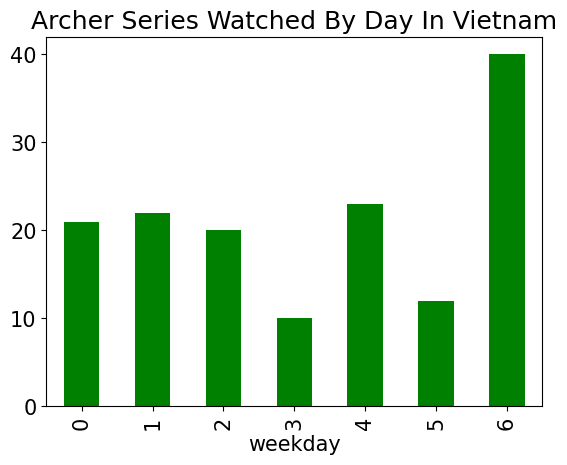

In [24]:
# VN - Plot the bar chart using the weekday values
plt.rcParams.update({'font.size': 15})
tatiendat21archervn_2_bydaysort.plot(kind = "bar", color = "green")
plt.title("Archer Series Watched By Day In Vietnam")
plt.show()

In [25]:
# VN - Count and sort the hour values
tatiendat21archervn_2_byhour = tatiendat21archervn_2["hour"].value_counts()
tatiendat21archervn_2_byhoursort = tatiendat21archervn_2_byhour.sort_index(ascending = True)
tatiendat21archervn_2_byhoursort

hour
0     11
1      5
2      5
7      2
9      3
10     9
11    12
12     7
13     6
14     2
15     6
16     5
17     9
18     8
19     5
20     4
21    10
22    22
23    17
Name: count, dtype: int64

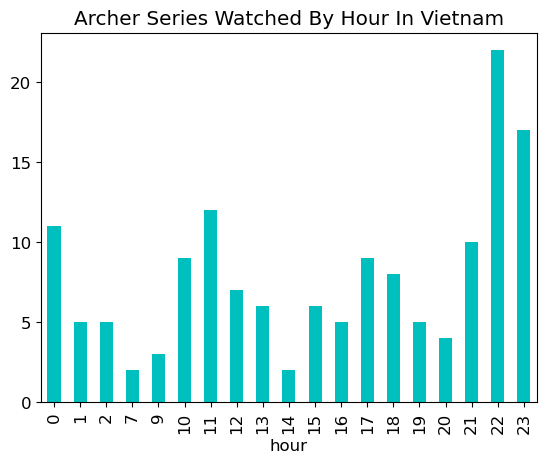

In [26]:
# VN - Plot the bar chart using the hour values with Vietnam's timezone
plt.rcParams.update({'font.size': 12})
tatiendat21archervn_2_byhoursort.plot(kind = "bar", color = "c")
plt.title("Archer Series Watched By Hour In Vietnam")
plt.show()

In [27]:
# AUS - Count and sort the weekday values
tatiendat21archeraus_2_byday = tatiendat21archeraus_2["weekday"].value_counts()
tatiendat21archeraus_2_bydaysort = tatiendat21archeraus_2_byday.sort_index(ascending = True)
tatiendat21archeraus_2_bydaysort

weekday
0    19
1    23
2    24
3    21
4    11
5    28
6    34
Name: count, dtype: int64

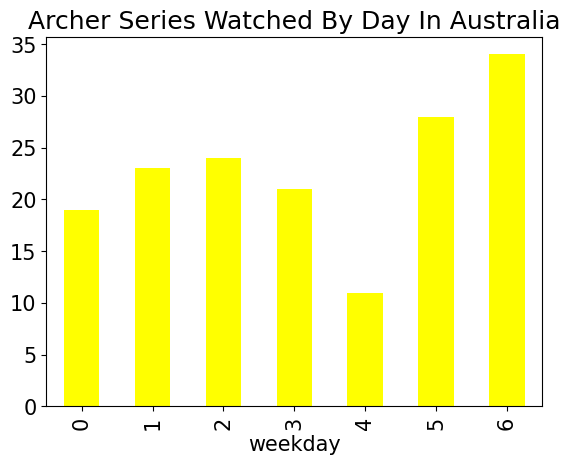

In [28]:
# AUS - Plot the bar chart using the weekday values
plt.rcParams.update({'font.size': 15})
tatiendat21archeraus_2_bydaysort.plot(kind = "bar", color = "yellow")
plt.title("Archer Series Watched By Day In Australia")
plt.show()

In [29]:
# AUS - Count and sort the hour values
tatiendat21archeraus_2_byhour = tatiendat21archeraus_2["hour"].value_counts()
tatiendat21archeraus_2_byhoursort = tatiendat21archeraus_2_byhour.sort_index(ascending = True)
tatiendat21archeraus_2_byhoursort

hour
0     10
1      4
2      4
7      1
8      1
9      6
10    10
11     9
12     4
13     4
14     3
16     3
17     3
18     4
19     8
20    19
21    33
22    20
23    14
Name: count, dtype: int64

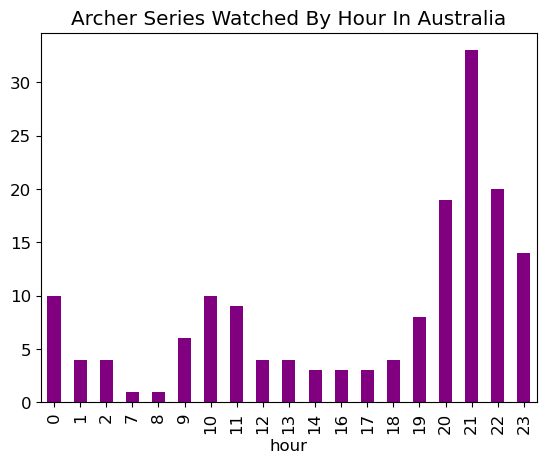

In [30]:
# AUS - Plot the bar chart using the hour values with Melbourne's timezone
plt.rcParams.update({'font.size': 12})
tatiendat21archeraus_2_byhoursort.plot(kind = "bar", color = "purple")
plt.title("Archer Series Watched By Hour In Australia")
plt.show()